# Magnetic Resonance Fingerprinting (MRF)

In [1]:
%matplotlib inline

import numpy as np
import sigpy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

import utils
from demo_mrf import *

In [2]:
vmin = 0
vmax = 0.015
mpl.rcParams["text.usetex"] = True
mpl.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
mpl.rc("xtick", labelsize=20)
mpl.rc("ytick", labelsize=20)

## Load results.

In [3]:
fista = sp.fft(np.load("results/mrf/fista_4.50x10^-5/iter_001.npy"), axes=(0,))
pfista = sp.fft(np.load("results/mrf/pfista_7.50x10^-4_5/iter_001.npy"), axes=(0,))

In [4]:
fista_base = "results/mrf/fista_4.50x10^-5/subproblem/"
fista_time = np.load(f"{fista_base}/time.npy")
fista_aha = np.arange(fista_time.size)
fista_conv = utils.calc_conv(fista_base)

In [5]:
pfista_base = "results/mrf/pfista_7.50x10^-4_5/subproblem/"
pfista_time = np.load(f"{pfista_base}/time.npy")
pfista_aha = np.arange(pfista_time.size) * 5
pfista_conv = utils.calc_conv(pfista_base)

## Plots.

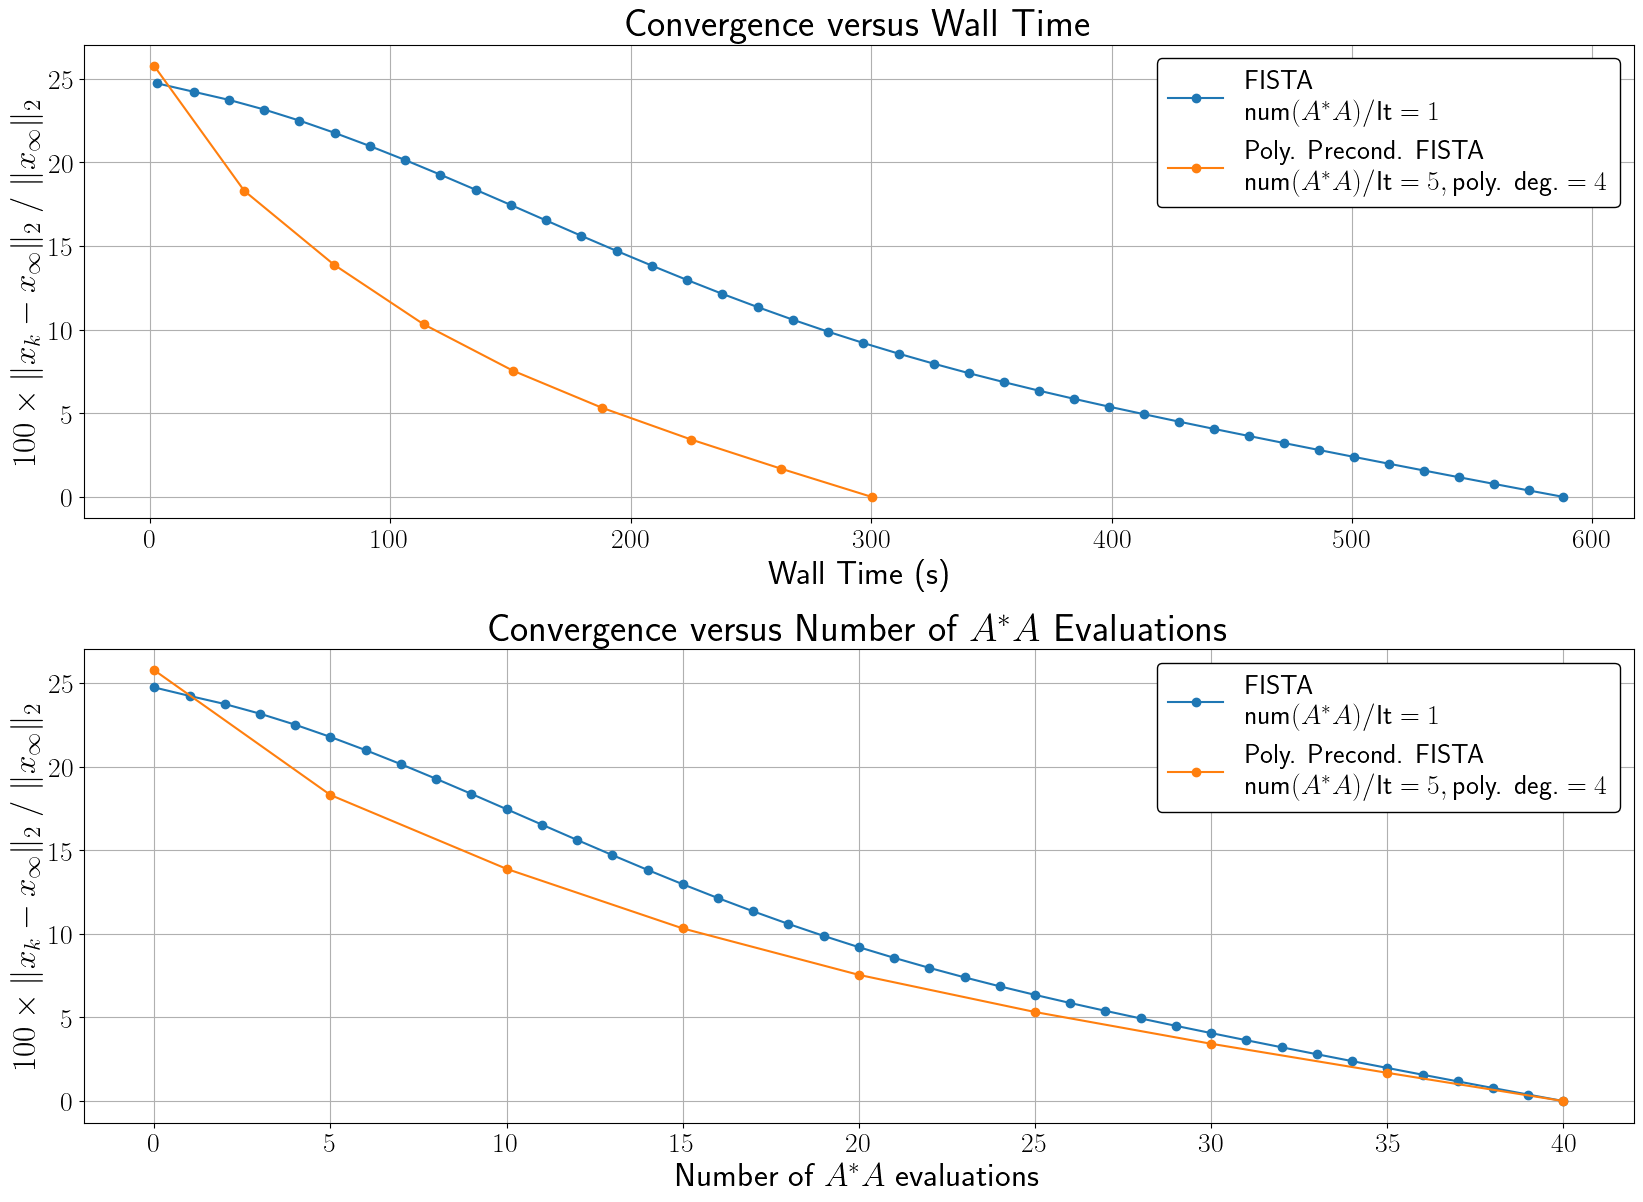

In [6]:
legend = [
    "FISTA\n$\\text{num}(A^*A)/\\text{It}=1$",
    "Poly. Precond. FISTA\n$\\text{num}(A^*A)/\\text{It}=5, \\text{poly. deg.}=4$",
]
(fig, axs) = plt.subplots(2, 1, figsize=(20, 14), dpi=100)

axs[0].plot(fista_time, fista_conv, marker="o")
axs[0].plot(pfista_time, pfista_conv, marker="o")
axs[0].set_xlabel("Wall Time (s)", fontsize=24)
axs[0].set_title("Convergence versus Wall Time", fontsize=28)

axs[1].plot(fista_aha, fista_conv, marker="o")
axs[1].plot(pfista_aha, pfista_conv, marker="o")
axs[1].set_xlabel("Number of $A^*A$ evaluations", fontsize=24)
axs[1].set_title("Convergence versus Number of $A^*A$ Evaluations", fontsize=28)

for ax in axs.ravel():
    ax.set_ylabel(
        "$100 \\times \lVert x_k - x_\infty \\rVert_2 \;/\; \lVert x_\infty \\rVert_2$",
        fontsize=24,
    )
    ax.legend(
        legend, ncol=1, fontsize=20, loc="upper right", framealpha=1, edgecolor="black"
    )
    ax.grid()

plt.subplots_adjust(hspace=0.275);

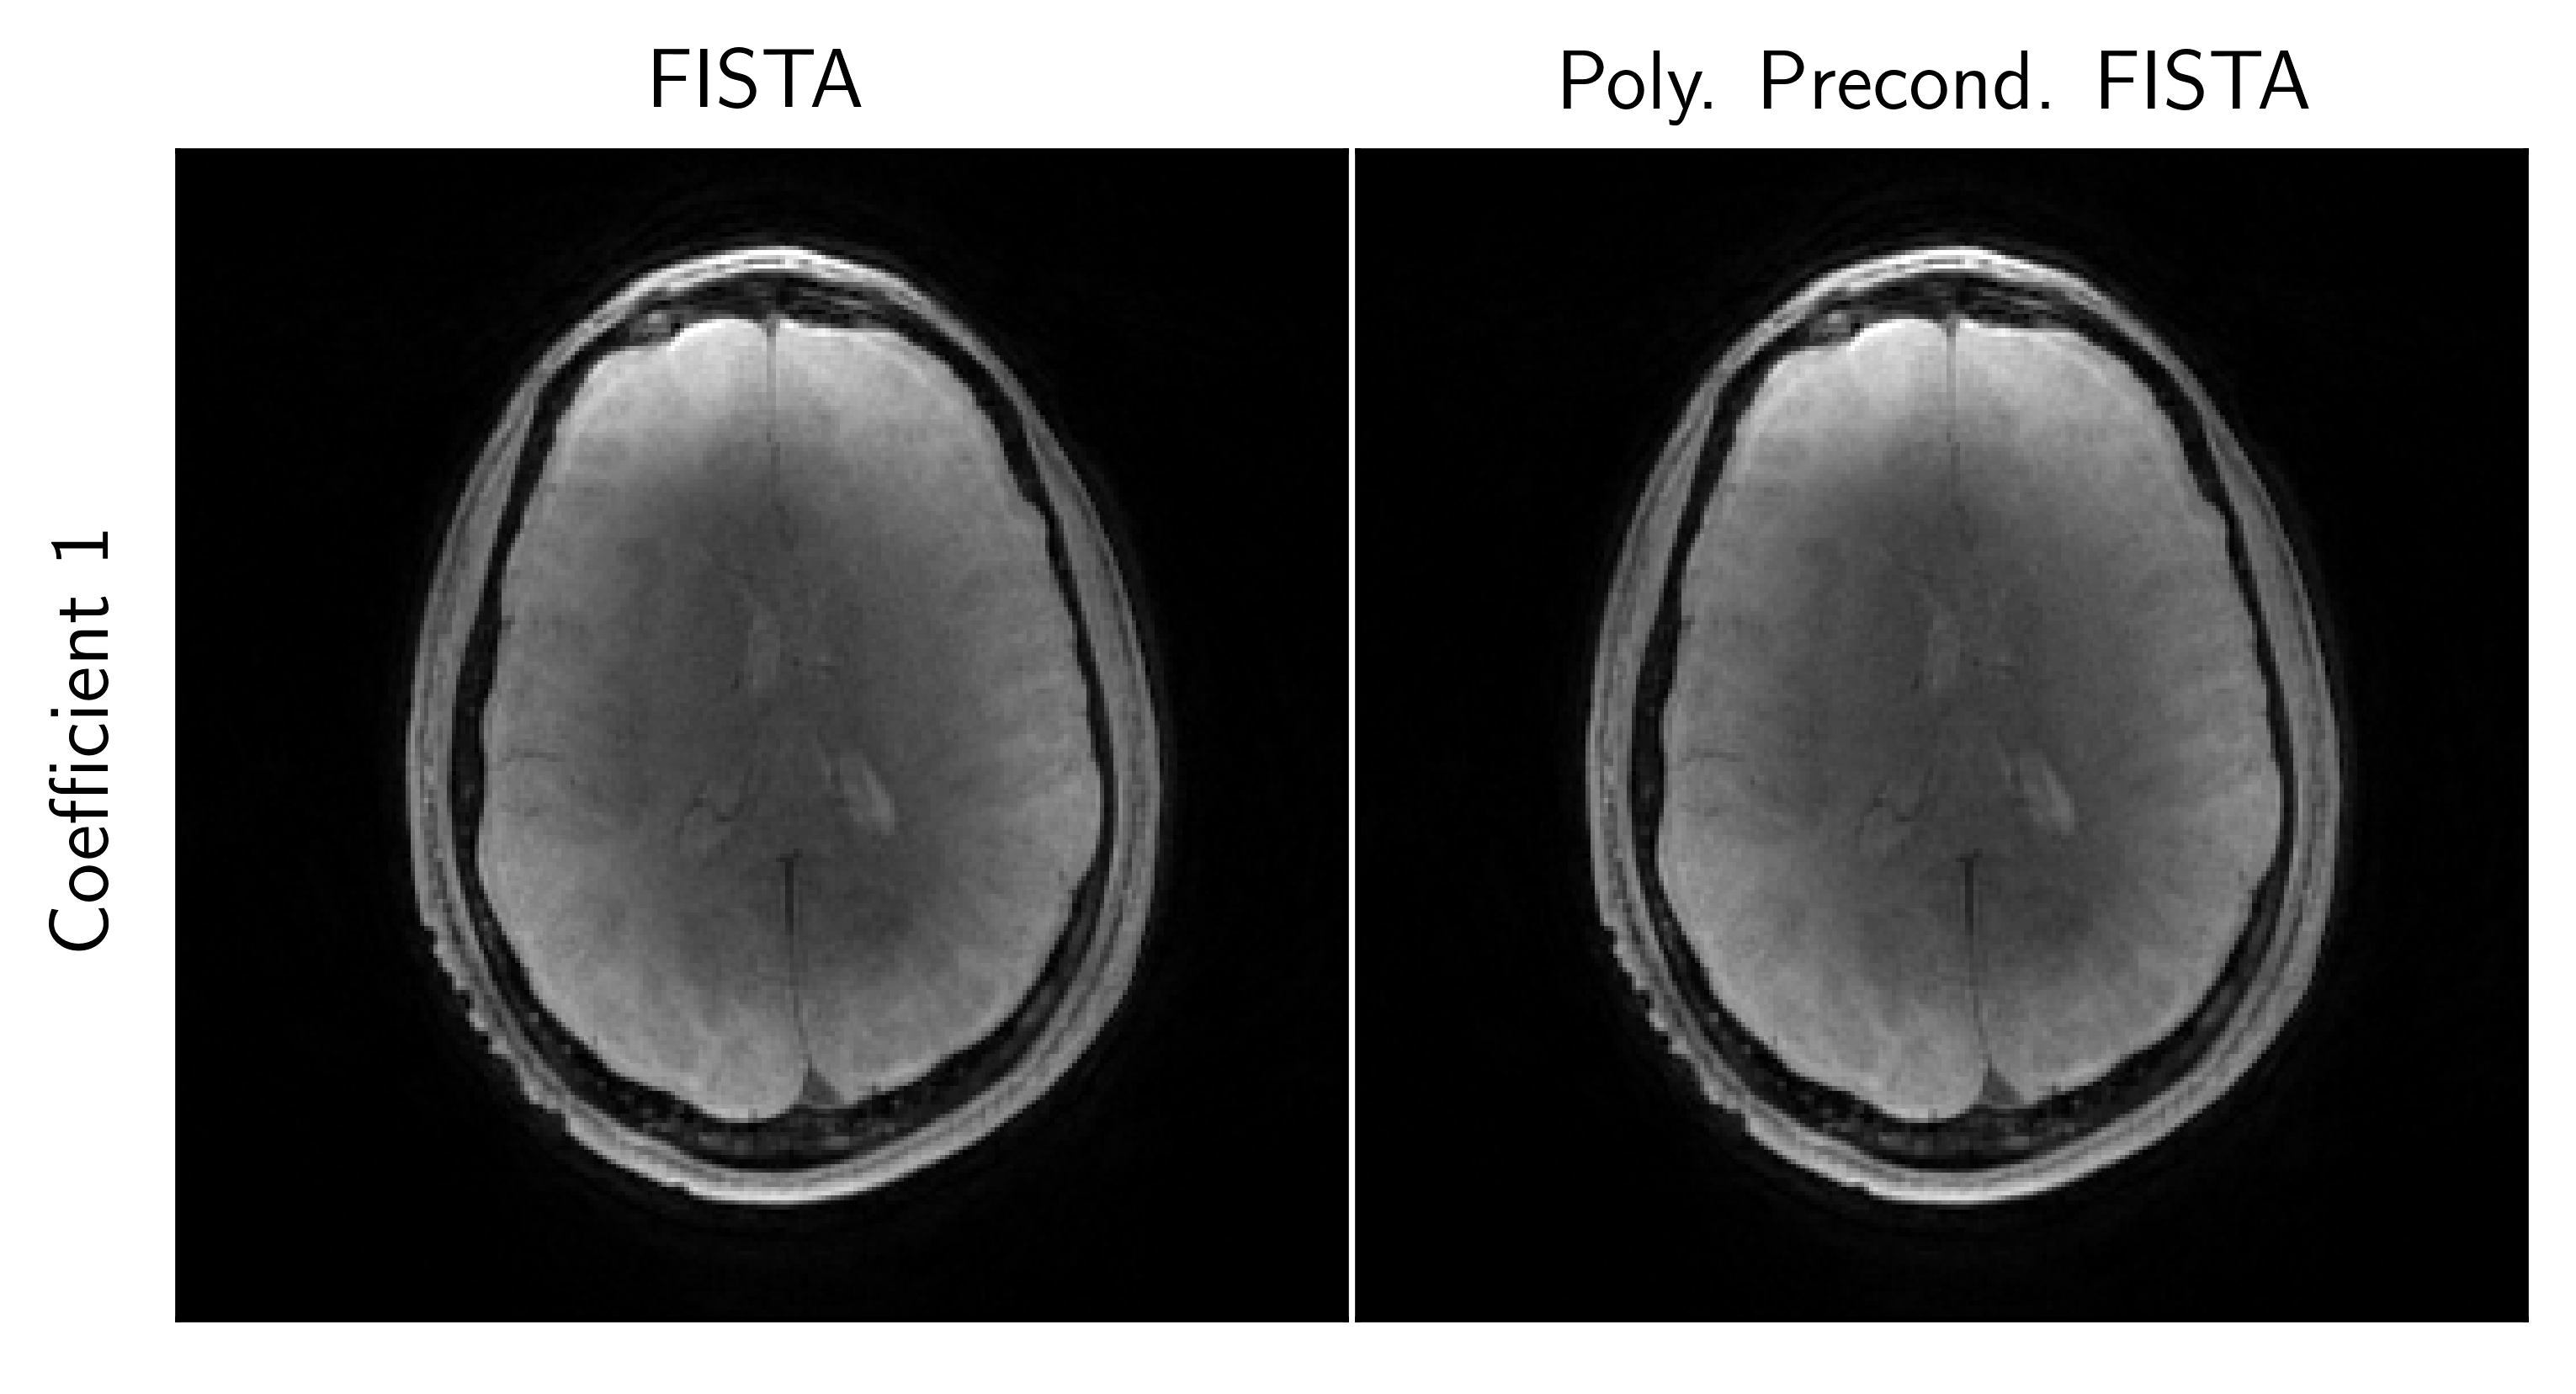

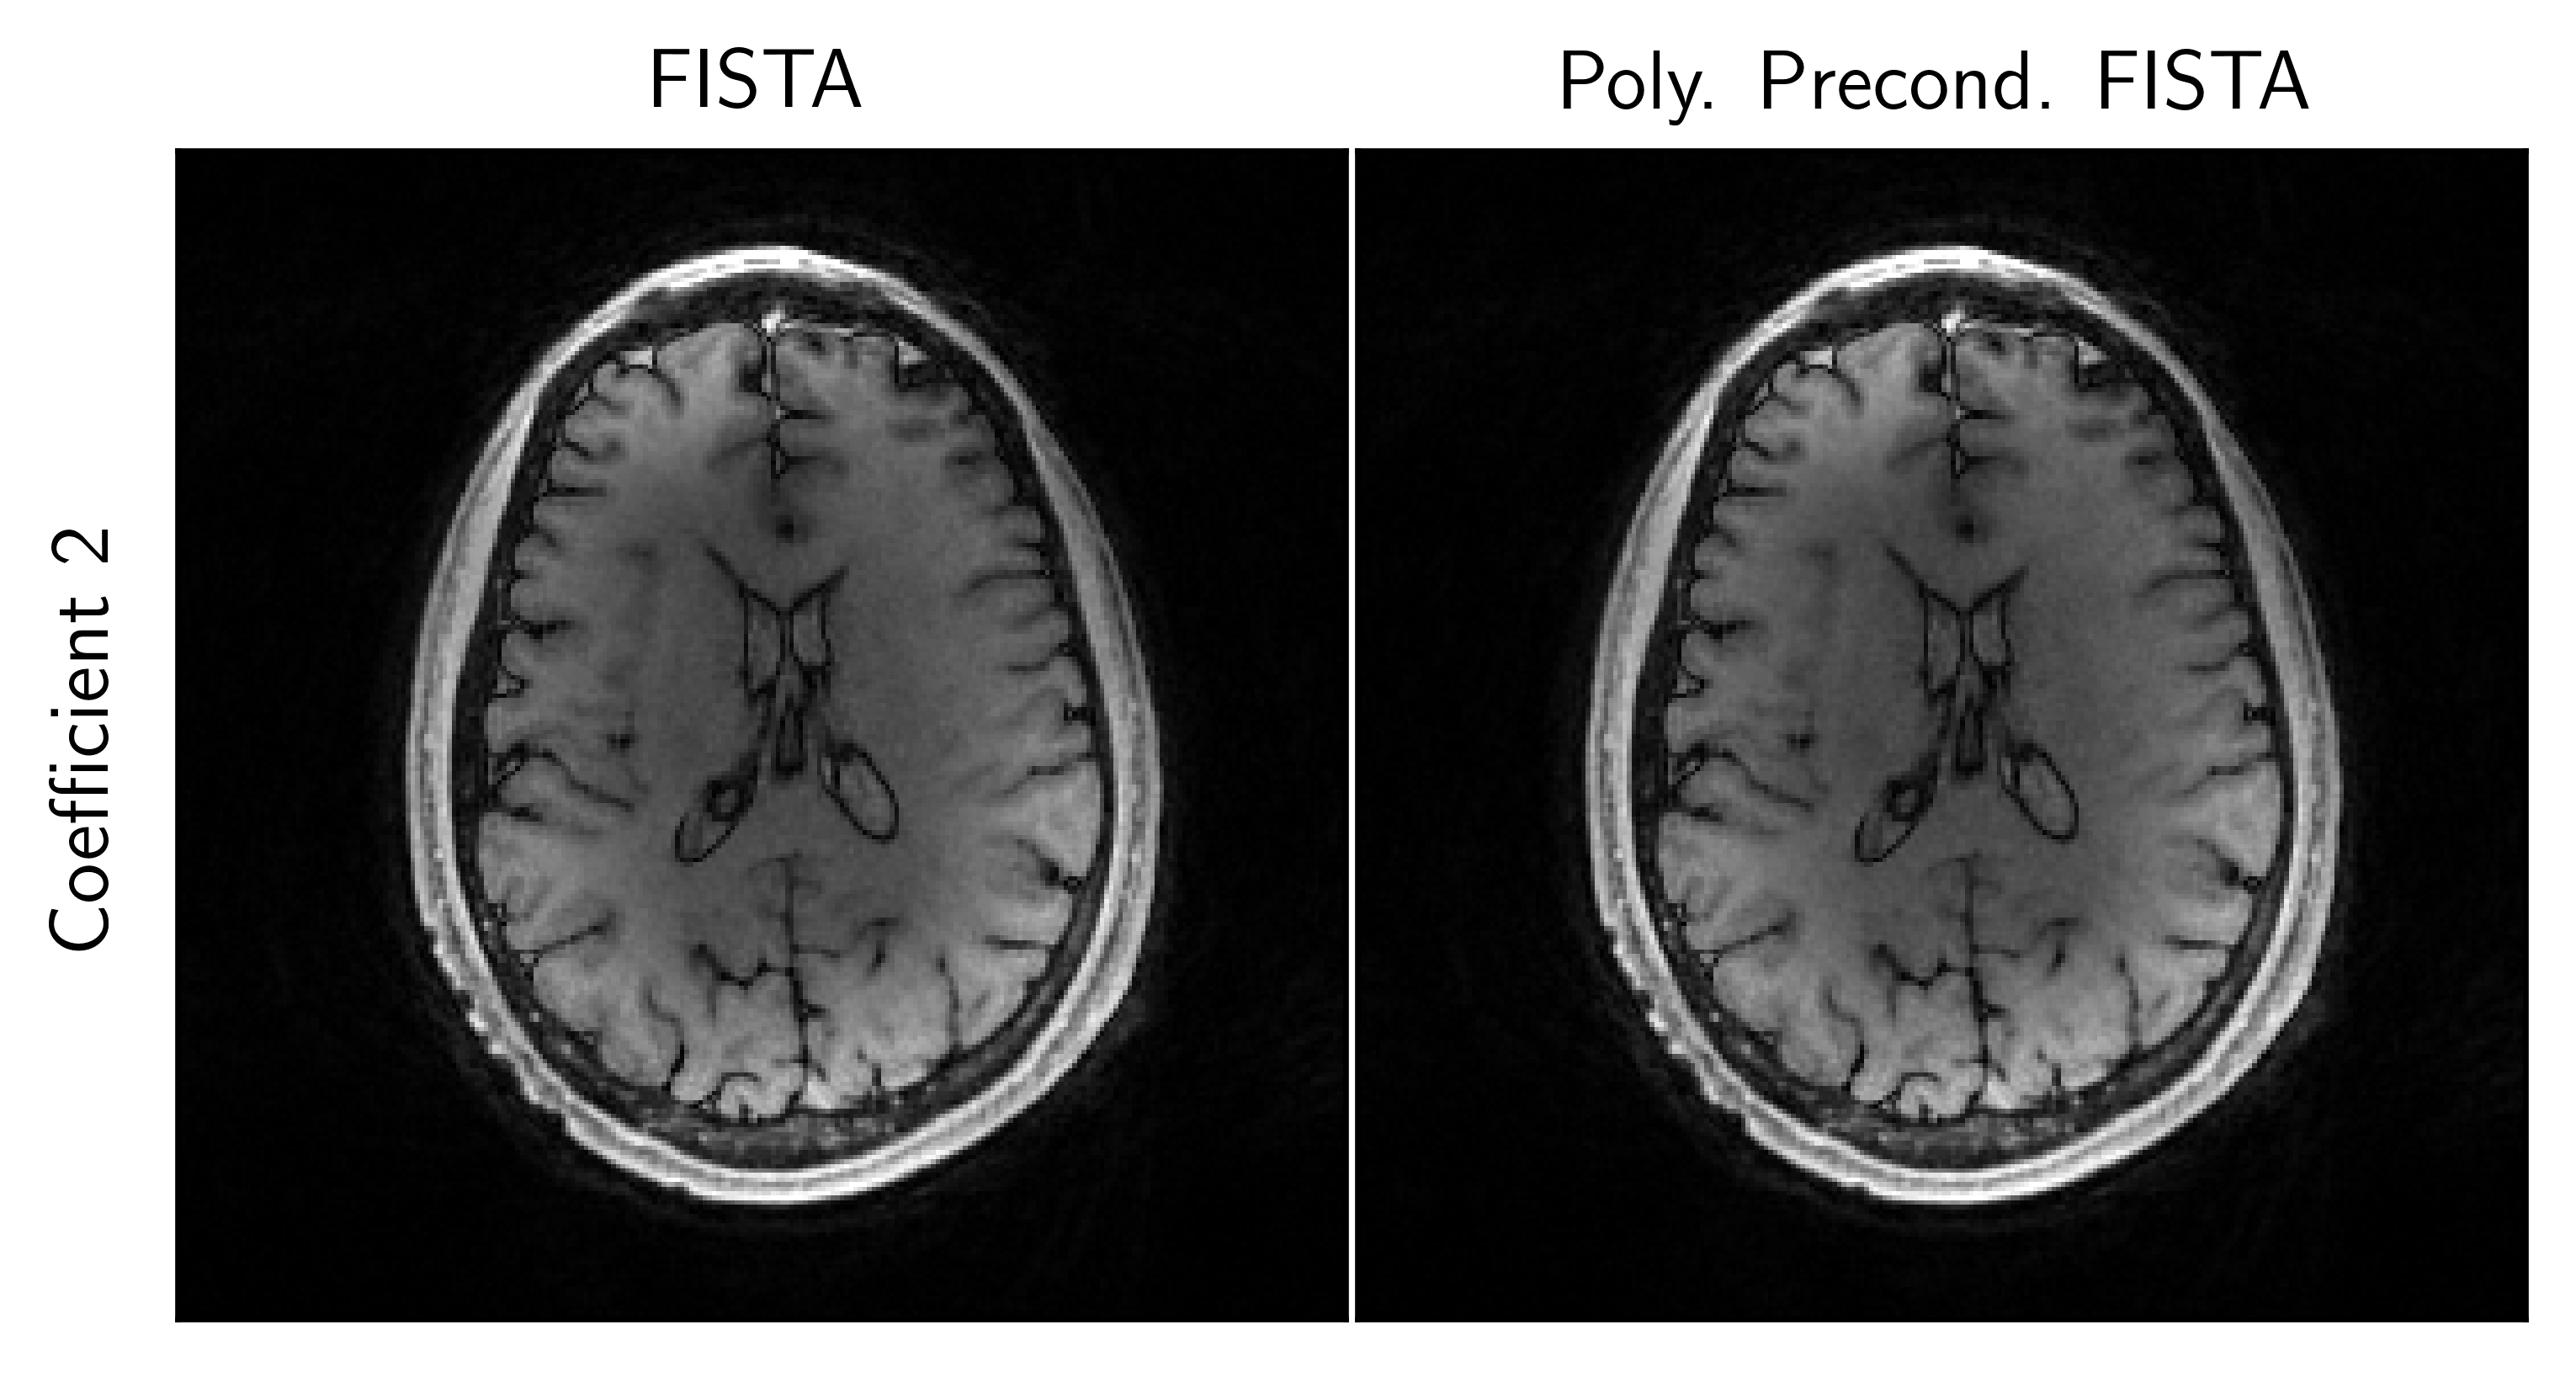

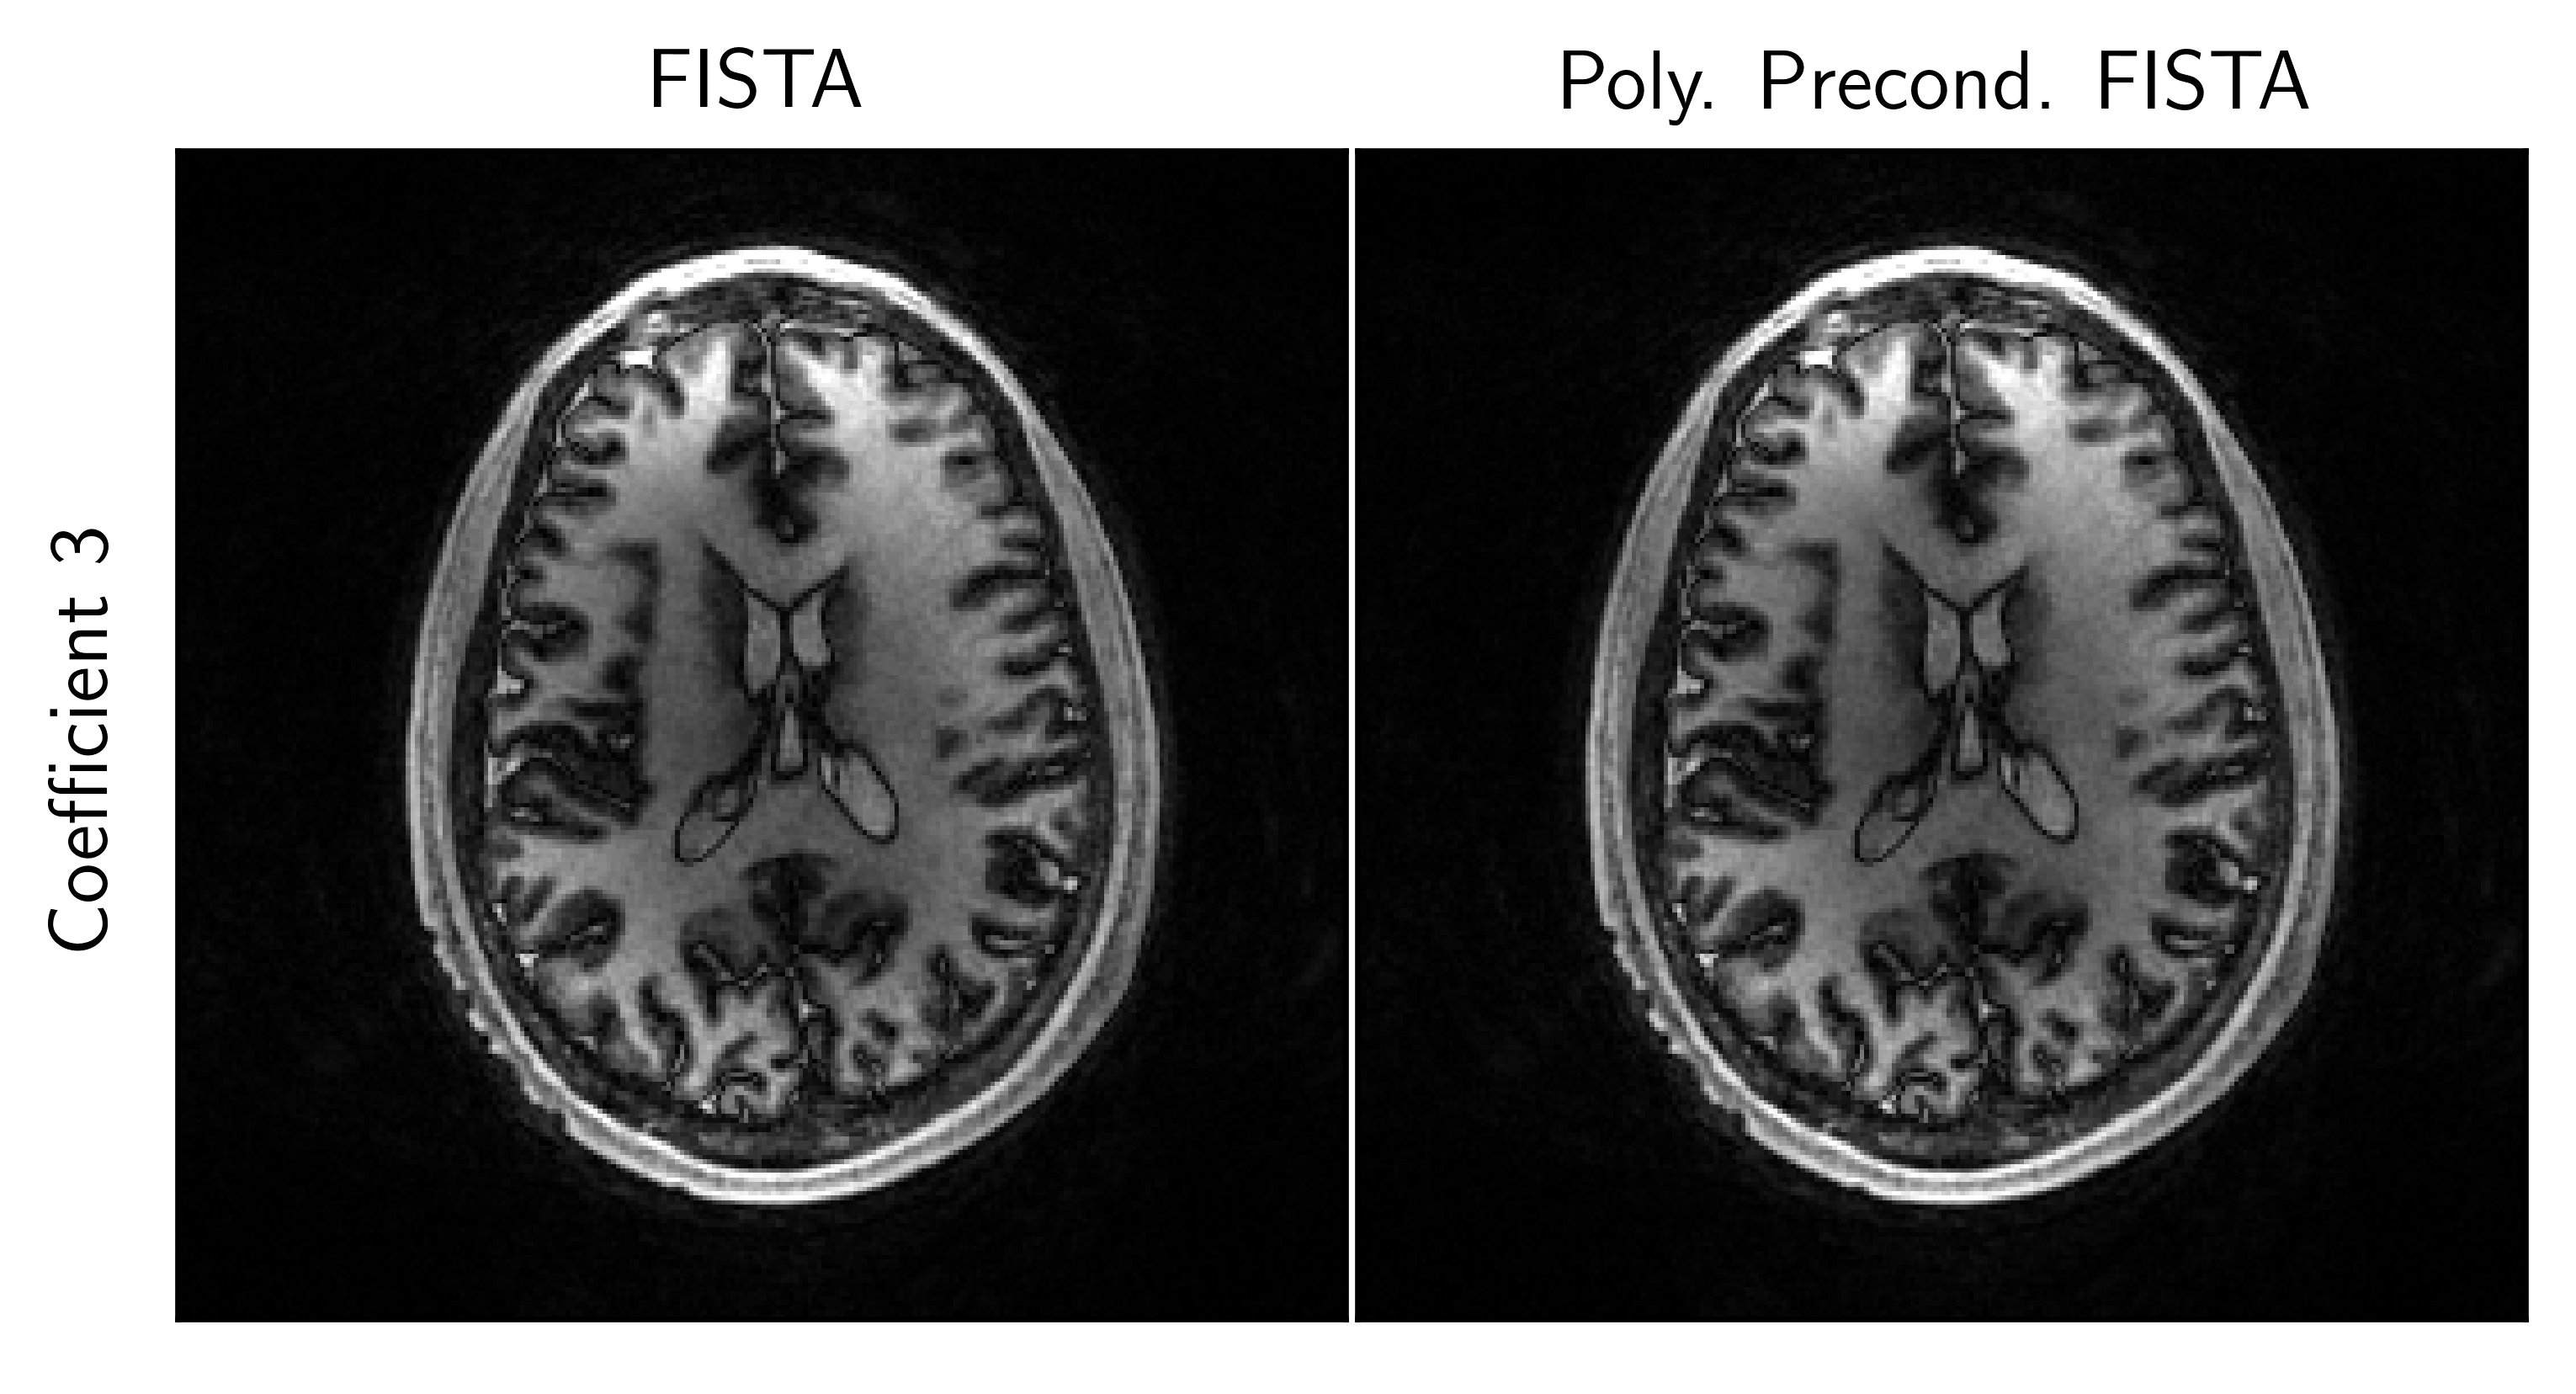

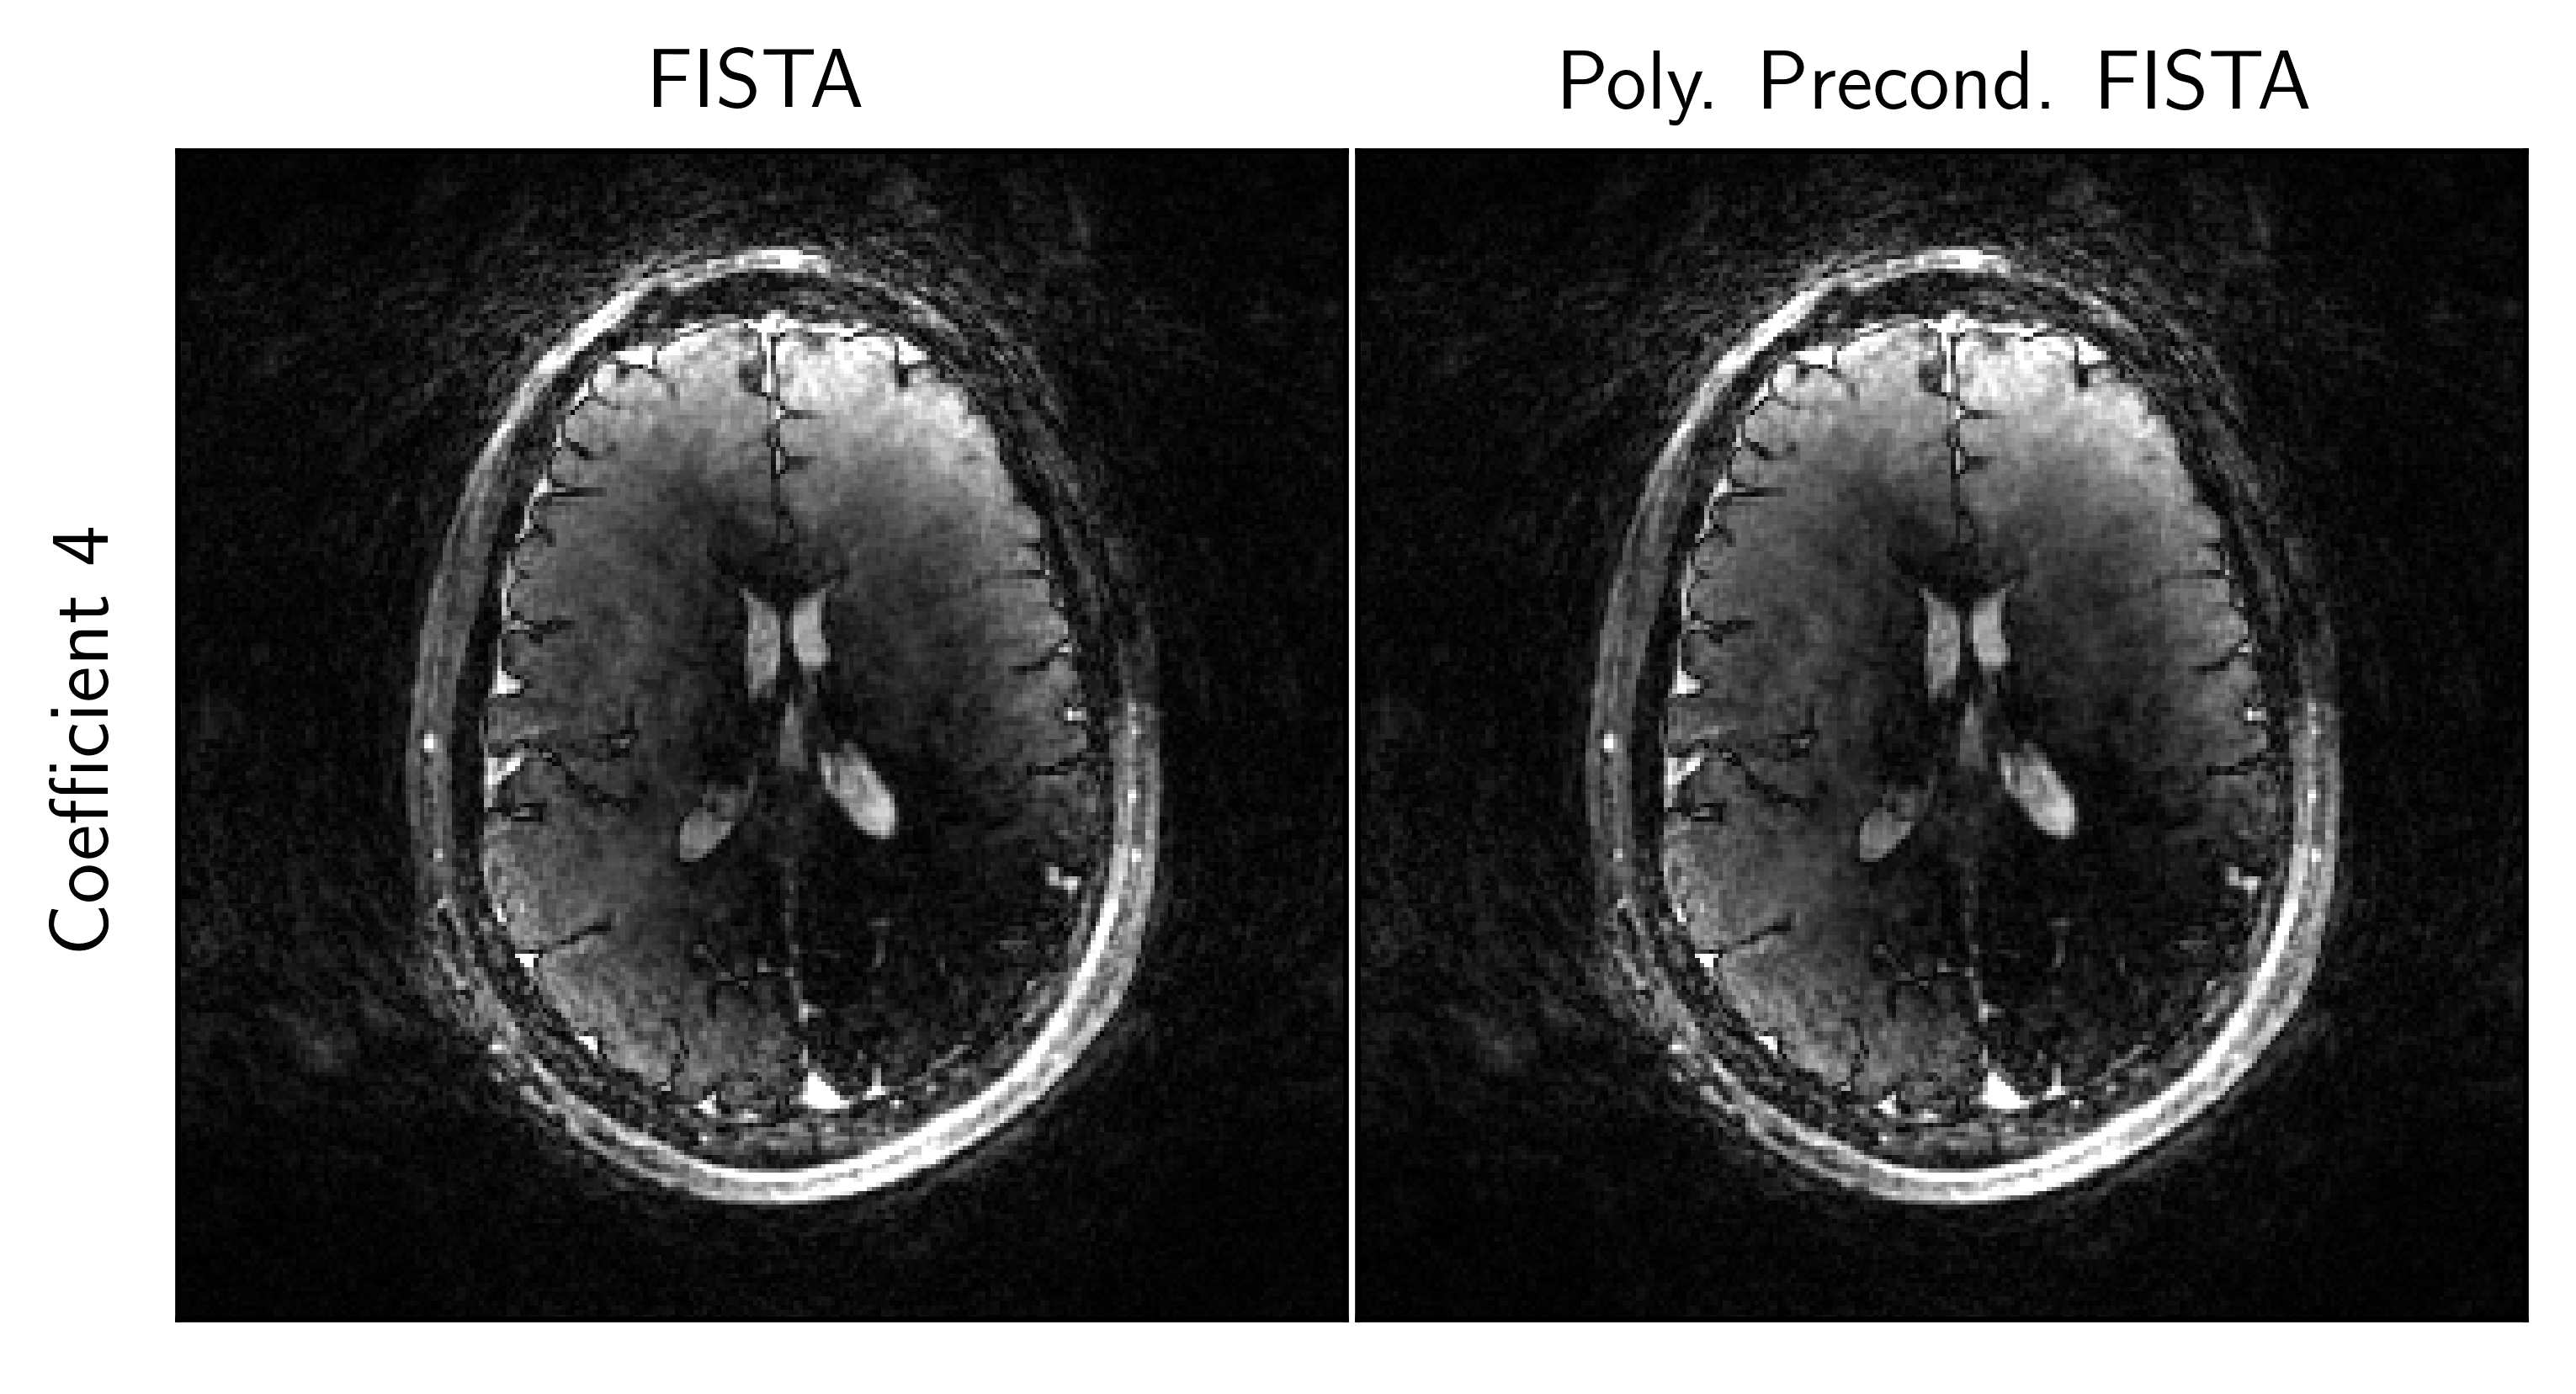

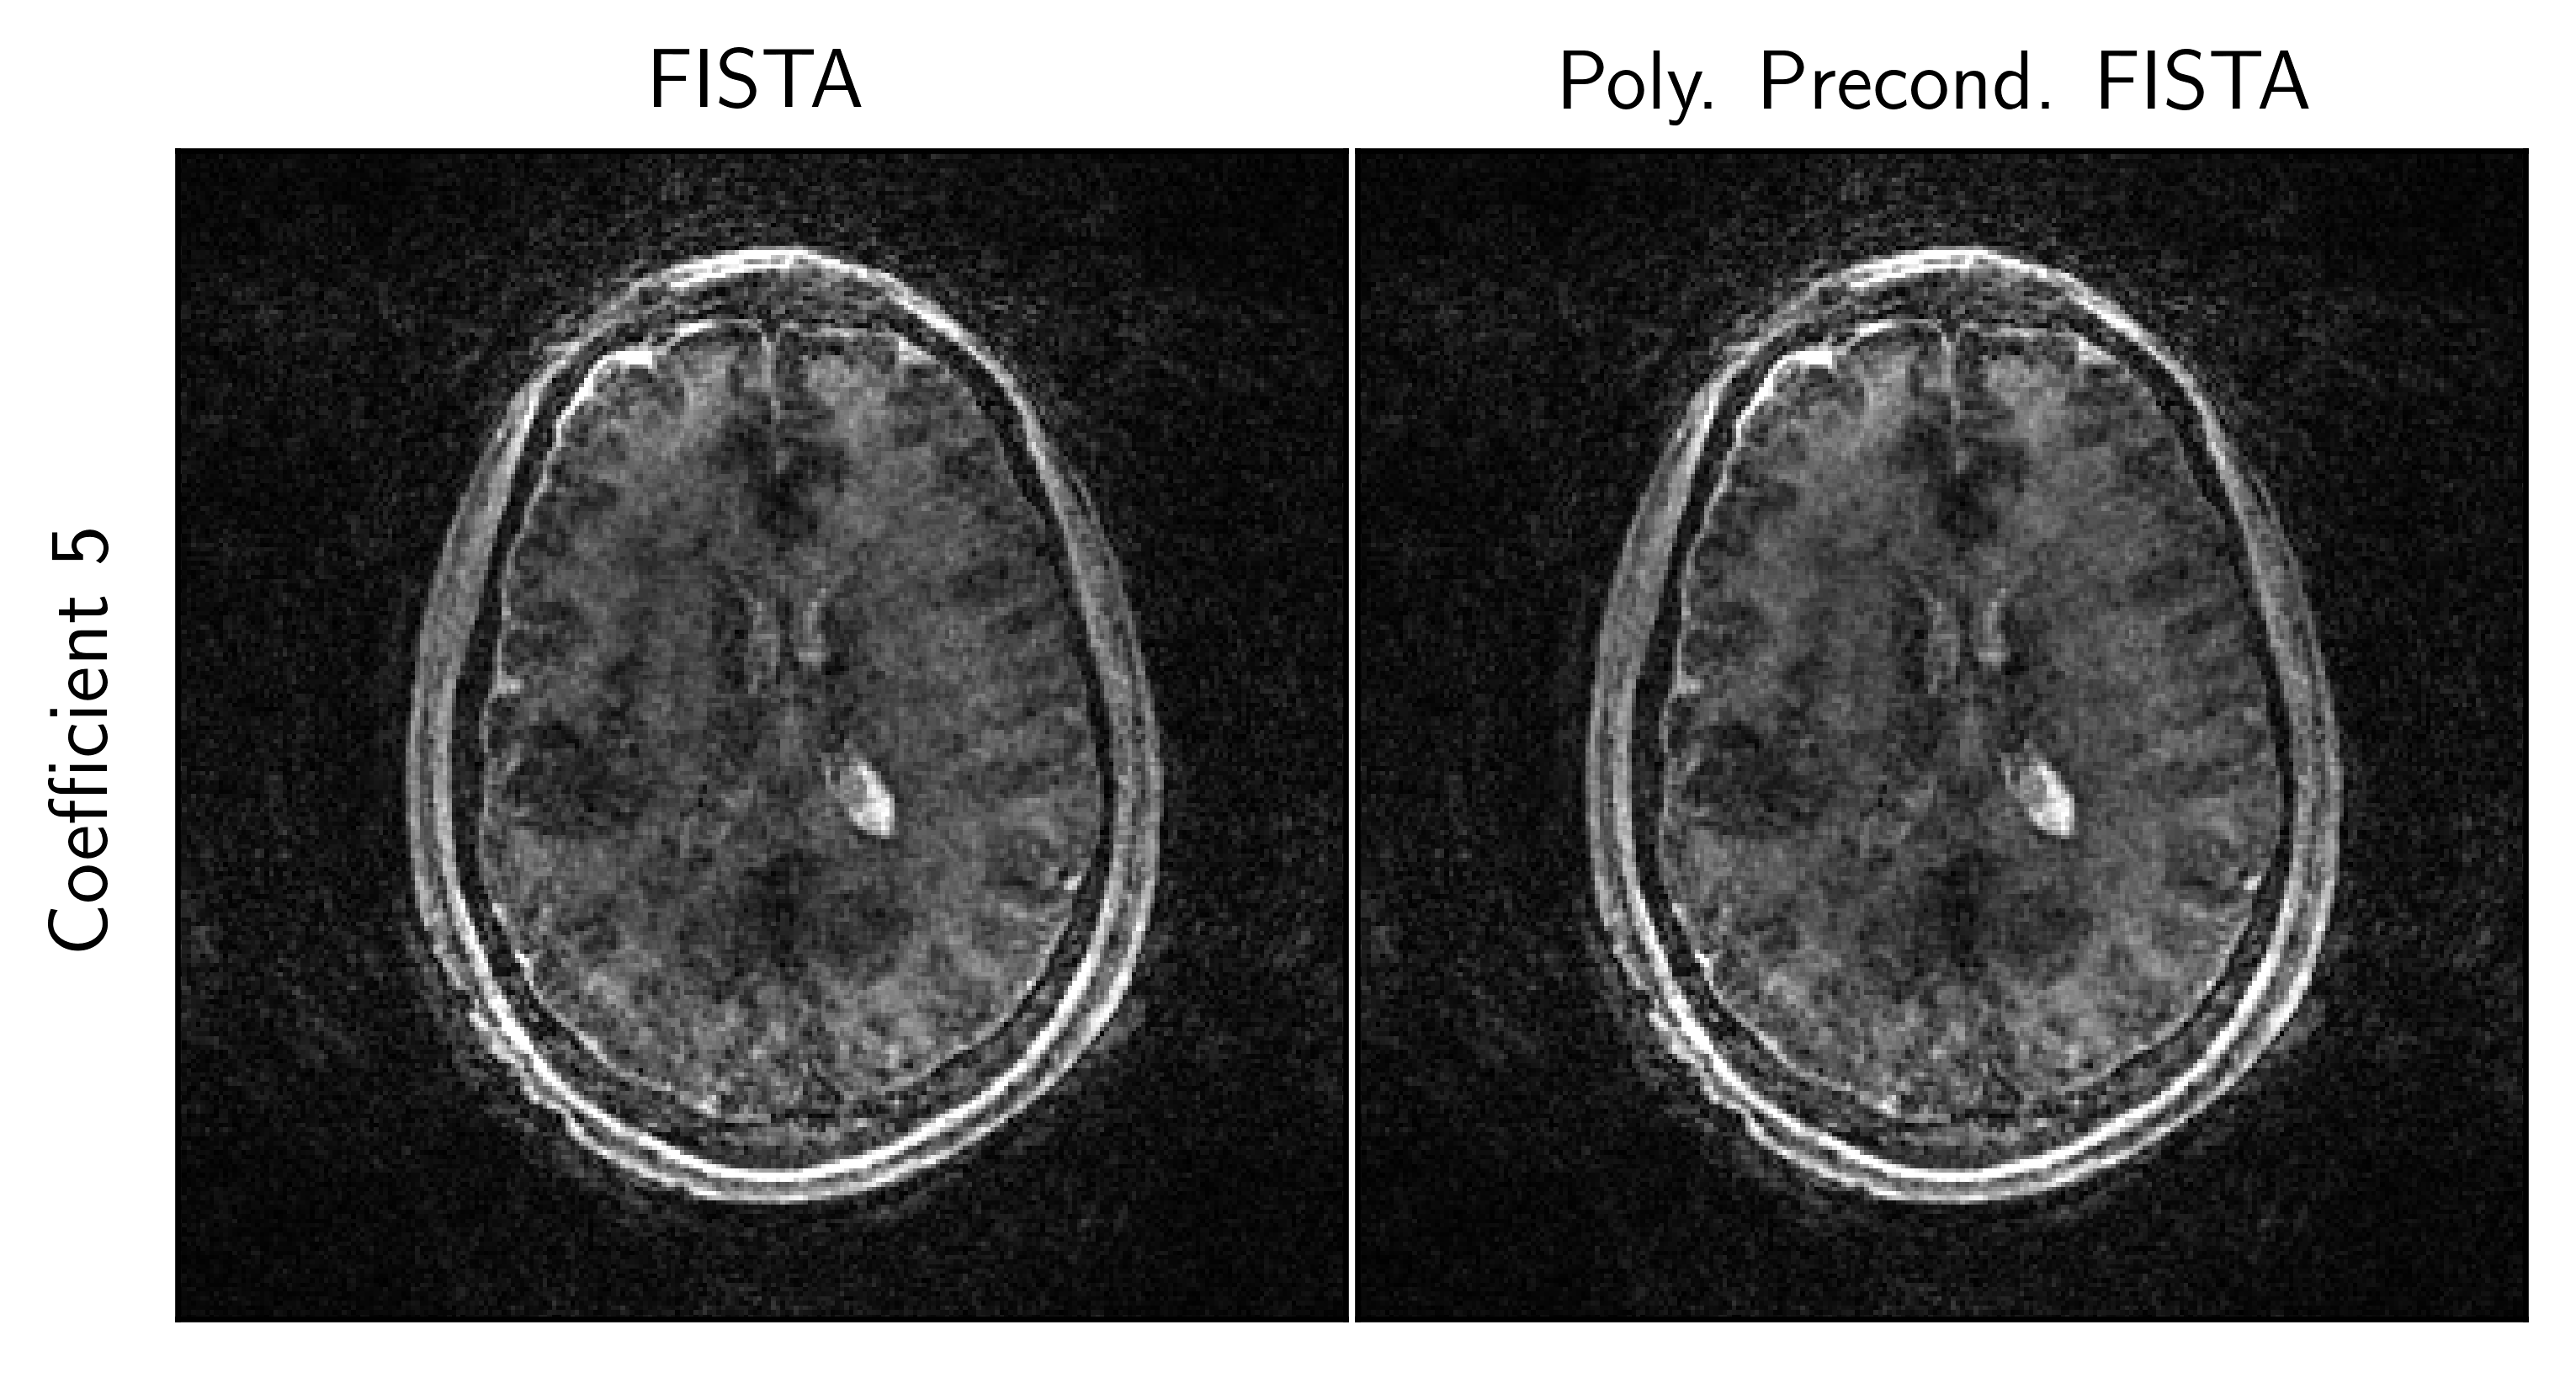

In [7]:
sdx = 155

for tk in range(5):
    (fig, axs) = plt.subplots(1, 2, figsize=(6, 5), dpi=600)

    f = lambda x: x[tk, sdx, ::-1, :] / np.linalg.norm(x[tk, sdx, ...])

    axs[0].imshow(np.abs(f(fista)), cmap="gray", vmin=0, vmax=vmax)
    axs[1].imshow(np.abs(f(pfista)), cmap="gray", vmin=0, vmax=vmax)

    axs[0].set_title("FISTA")
    axs[1].set_title("Poly. Precond. FISTA")

    for ax in axs.ravel():
        ax.set_xticks([])
        ax.set_yticks([])

    axs[0].set_ylabel("Coefficient %d" % (tk + 1), fontsize=12)

    plt.subplots_adjust(wspace=0.01, hspace=0.075)

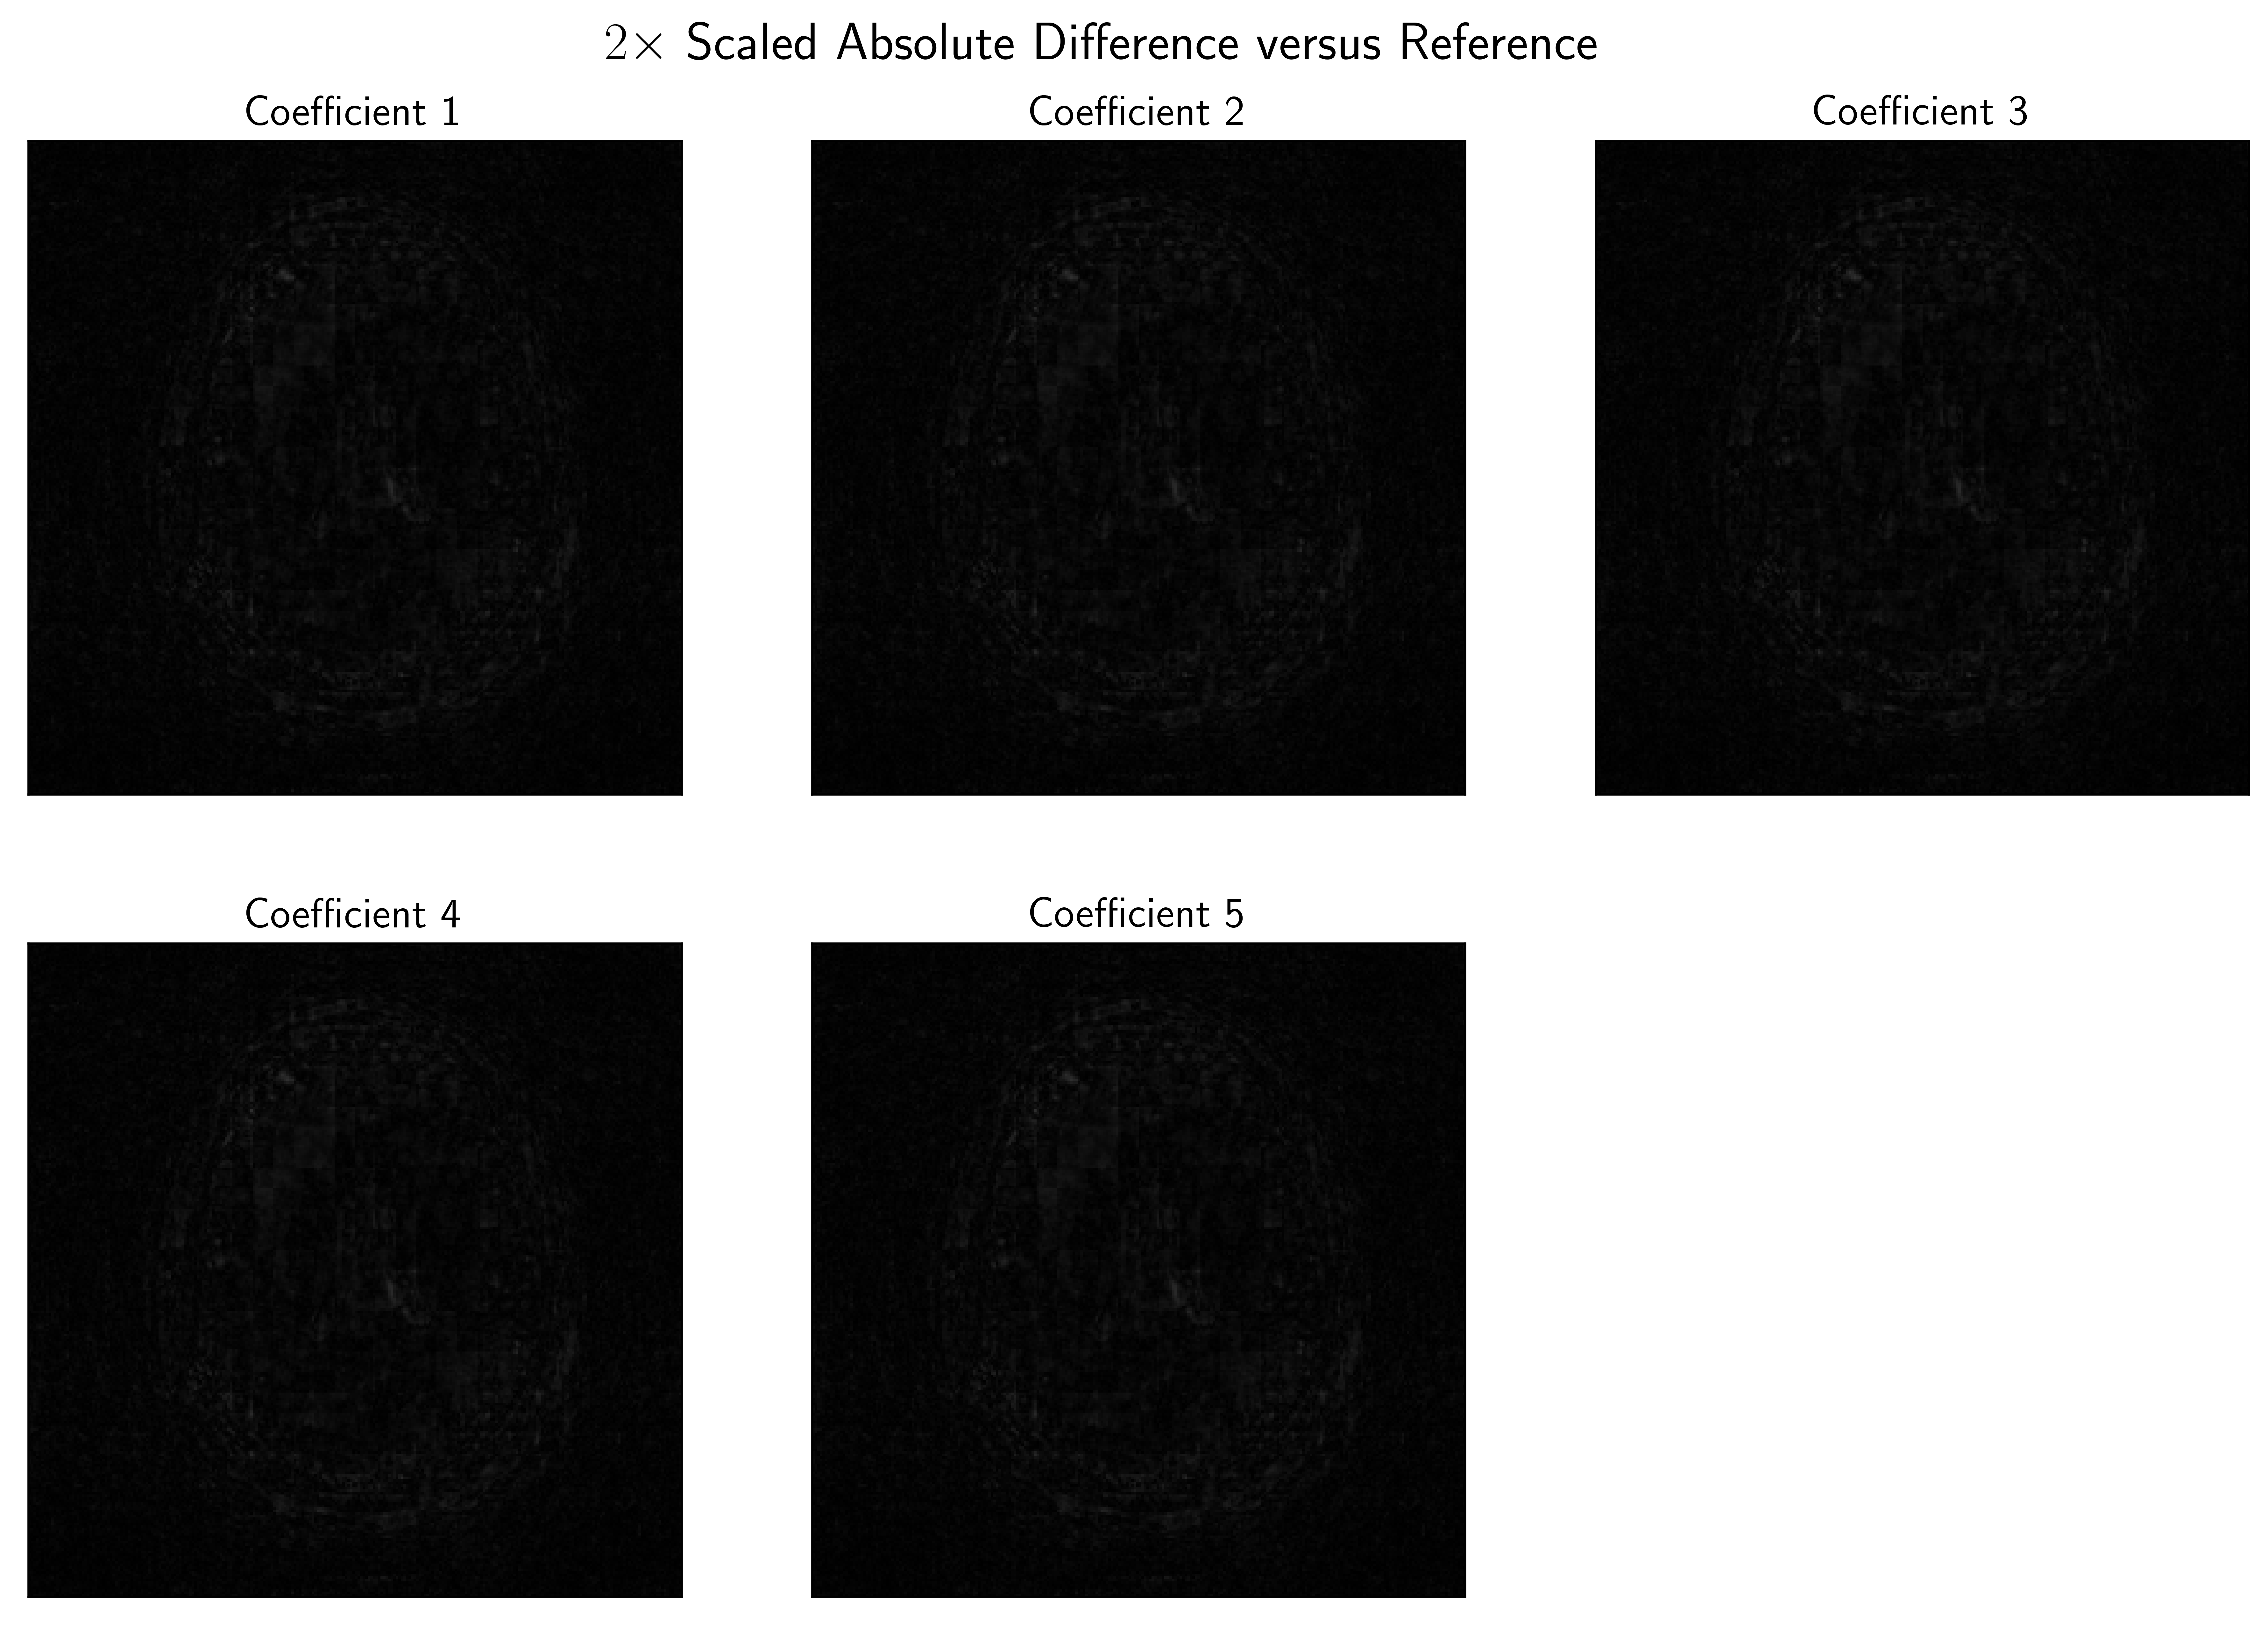

In [8]:
sdx = 155
f = lambda x: x[tk, sdx, ::-1, :] / np.linalg.norm(x[tk, sdx, ...])

(fig, axs) = plt.subplots(2, 3, figsize=(15, 10), dpi=600)

k = 0
for p in range(axs.shape[0]):
    for q in range(axs.shape[1]):
        k += 1
        axs[p][q].imshow(
            2 * np.abs(f(fista) - f(pfista)), cmap="gray", vmin=0, vmax=vmax
        )
        axs[p][q].set_title("Coefficient %d" % (k), fontsize=16)

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

axs[-1][-1].remove()
plt.suptitle(
    r"$2 \times$ Scaled Absolute Difference versus Reference", fontsize=20, y=0.94
);

## End of notebook.